In [38]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [40]:
data = pd.read_csv("Advertising.csv")

In [41]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


we can see that there are 3 indepedent features and to increase the sale in what medium like Tv, Radio, Newspaper we have to do the advertisment

In [42]:
data.shape

(200, 5)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [44]:
data.isna().sum() # seeing if there are any null values in the columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Now let's see and find the relationships between Sales vs TV, Sales vs Radio, Sales vs Newspapers using a scatter plot

<Axes: xlabel='newspaper', ylabel='sales'>

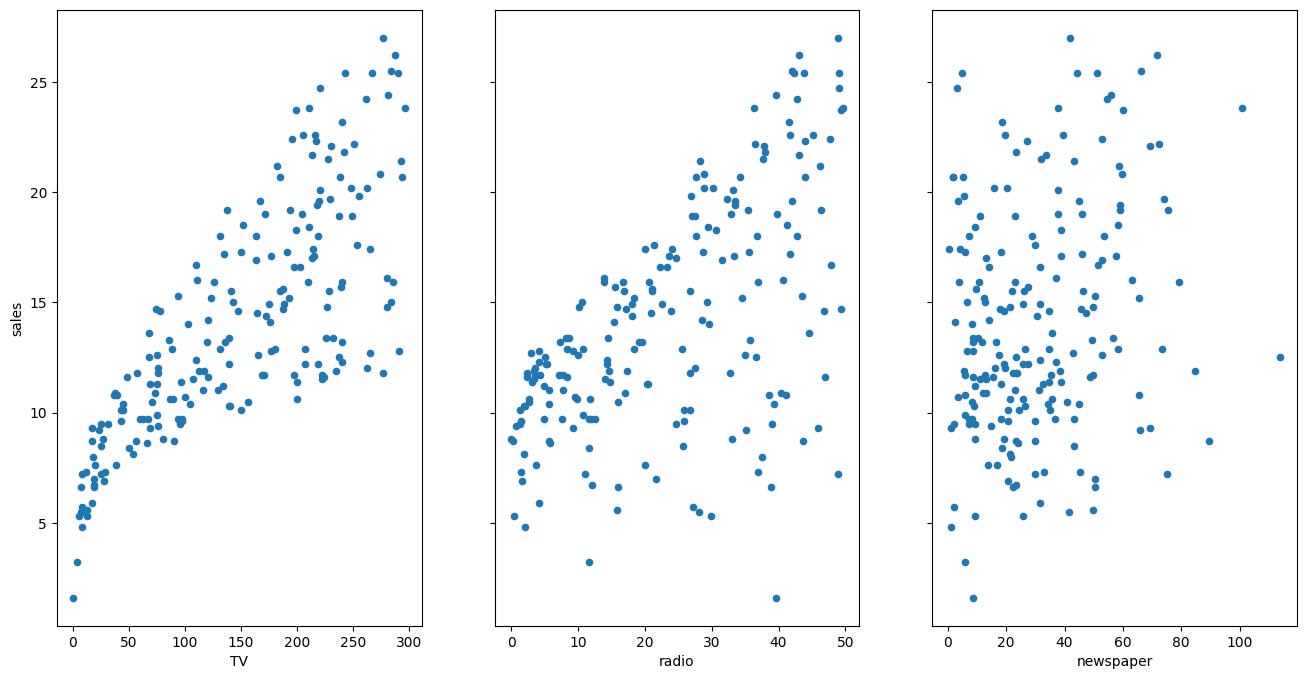

In [45]:
fig, axs = plt.subplots(1,3,sharey=True) # this line makes sure that the graphs must be in 1 rows and 3 columns
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1],figsize=(16,8))
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2],figsize=(16,8))

#### we can see that in the sales vs TV graph that when the amount spend on Tv advertisements increse then the sales are also increasing, and in the second graph it is not clear that if the spend on radio increses then sales as increasing or not because the data is scattered, in the third graph we can see that the sales are increasing until a certain amount spend after that there is not much increse.

In [46]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
x = data[['TV']]
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [48]:
y = data.sales
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [49]:
## we will do a linear regression with only one variable/ independent feature TV
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [50]:
lr.fit(x,y)

LinearRegression()

In [51]:
lr.intercept_

7.0325935491276885

In [52]:
# here i am trying to save my model
file = 'linear_reg.sav'
pickle.dump(lr,open(file,'wb'))

In [53]:
#example of how the model predicts
lr.predict([[45]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.17174237])

## multiple linear regression

In [54]:
features = ['TV','radio','newspaper']
x = data[features]
y = data.sales

In [55]:
lm = LinearRegression()

In [56]:
lm.fit(x,y)

LinearRegression()

In [57]:
lm.intercept_

2.9388893694594014

In [58]:
lm.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [59]:
# here i am trying to save my model
file = 'multiple_linear_reg.sav'
pickle.dump(lr,open(file,'wb'))

## ordinary least square methods

In [60]:
import statsmodels.formula.api as smf

In [61]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper',data=data).fit()

In [62]:
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [63]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        16:47:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Feature selection

In [64]:
# calculating the r-squared
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [65]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

we already know the selecting the highest R-squared model is not right because when the number of features increses then the value of the R-square also increses

The next alternative is to use the adjusted R-squared model becuase it can indirectly control the model overfitting but it will under-penalize the complexity

a better approach to feature selection is **Cross-validation.** It provides a more reliable way to choose which of the created models will best **generalise** as it better estimates of out-of-sample error. An advantage is that the cross-validation method can be applied to any machine learning model and the scikit-learn package provides extensive functionality for that.
 

## Handling categorical predictors with categorical variables

In [66]:
import numpy as np

In [67]:
np.random.seed(12345)

nums = np.random.rand(len(data))
mask_large = nums > 0.5

data['scale'] = "Small"
data.loc[mask_large,'scale'] = "Large"
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,scale
0,1,230.1,37.8,69.2,22.1,Large
1,2,44.5,39.3,45.1,10.4,Small
2,3,17.2,45.9,69.3,9.3,Small
3,4,151.5,41.3,58.5,18.5,Small
4,5,180.8,10.8,58.4,12.9,Large


since we are using scikit learn library we need to only have numeric data so we will create a new column for the categorical variables

In [68]:
data['IsLarge'] = data.scale.map({"Small":0,"Large":1})
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,scale,IsLarge
0,1,230.1,37.8,69.2,22.1,Large,1
1,2,44.5,39.3,45.1,10.4,Small,0
2,3,17.2,45.9,69.3,9.3,Small,0
3,4,151.5,41.3,58.5,18.5,Small,0
4,5,180.8,10.8,58.4,12.9,Large,1


In [69]:
features = ['TV','radio','newspaper','IsLarge']
x = data[features]
y = data.sales

lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [70]:
i = 0;
for col in features:
    print("The coefficient of ",col,'is :', lm.coef_[i])
    i = i+1

The coefficient of  TV is : 0.045719820924362824
The coefficient of  radio is : 0.18872814313427863
The coefficient of  newspaper is : -0.0010976794483515445
The coefficient of  IsLarge is : 0.057423850854828186


## Handling categorical predictors with two categorical variables

In [71]:
np.random.seed(123456)

nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66

data['Targeted Geography'] = 'rural'
data.loc[mask_suburban,'Targeted Geography'] = 'suburban'
data.loc[mask_urban,'Targeted Geography'] = 'urban'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,scale,IsLarge,Targeted Geography
0,1,230.1,37.8,69.2,22.1,Large,1,rural
1,2,44.5,39.3,45.1,10.4,Small,0,urban
2,3,17.2,45.9,69.3,9.3,Small,0,rural
3,4,151.5,41.3,58.5,18.5,Small,0,urban
4,5,180.8,10.8,58.4,12.9,Large,1,suburban


In [74]:
# create dummy columns
area_dummies = pd.get_dummies(data['Targeted Geography'],prefix='Targeted Geography').iloc[:,1:]

In [75]:
data = pd.concat([data,area_dummies],axis=1)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,scale,IsLarge,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban
0,1,230.1,37.8,69.2,22.1,Large,1,rural,False,False
1,2,44.5,39.3,45.1,10.4,Small,0,urban,False,True
2,3,17.2,45.9,69.3,9.3,Small,0,rural,False,False
3,4,151.5,41.3,58.5,18.5,Small,0,urban,False,True
4,5,180.8,10.8,58.4,12.9,Large,1,suburban,True,False


In [77]:
features = ['TV','radio','newspaper','IsLarge','Targeted Geography_suburban','Targeted Geography_urban']
x = data[features]
y = data.sales

lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [78]:
print(features,lm.coef_)

['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]
